In [4]:
import pandas as pd
import matplotlib.pyplot as plt

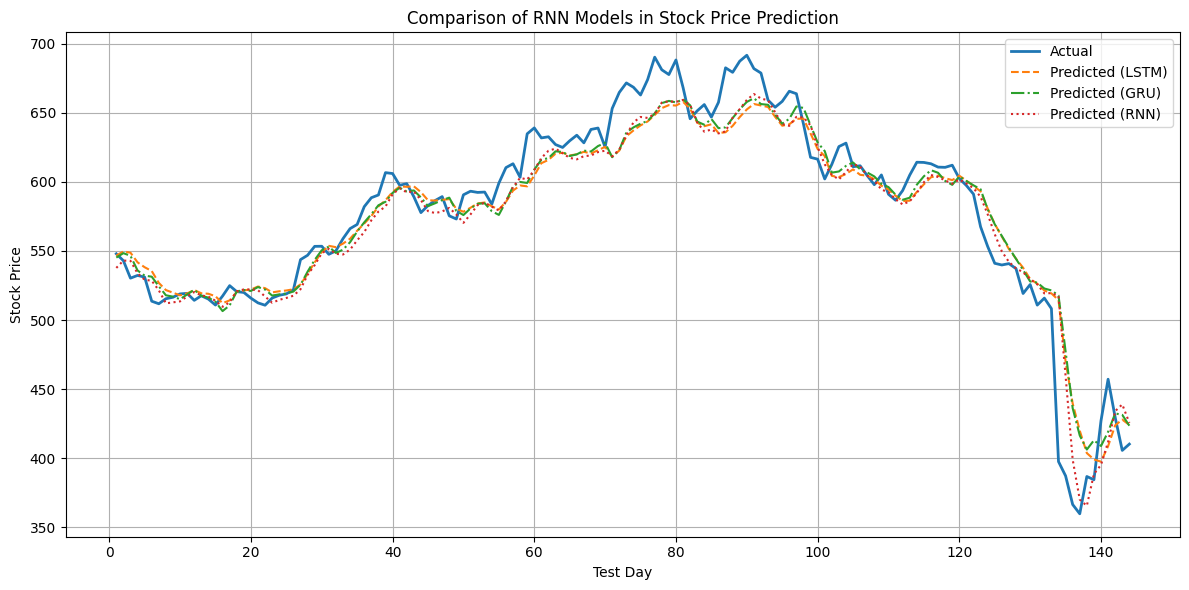

In [6]:
# Load the CSV file
file_path = "different_model/predictions.csv"
data = pd.read_csv(file_path)

# Check if the required columns are present
required_columns = ['Test Day', 'Actual', 'Predicted (LSTM)', 'Predicted (GRU)', 'Predicted (RNN)']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"CSV file must contain the following columns: {', '.join(required_columns)}")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Test Day'], data['Actual'], label='Actual', linewidth=2)
plt.plot(data['Test Day'], data['Predicted (LSTM)'], label='Predicted (LSTM)', linestyle='--')
plt.plot(data['Test Day'], data['Predicted (GRU)'], label='Predicted (GRU)', linestyle='-.')
plt.plot(data['Test Day'], data['Predicted (RNN)'], label='Predicted (RNN)', linestyle=':')

# Add labels, title, legend, and grid
plt.xlabel('Test Day')
plt.ylabel('Stock Price')
plt.title('Comparison of RNN Models in Stock Price Prediction')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

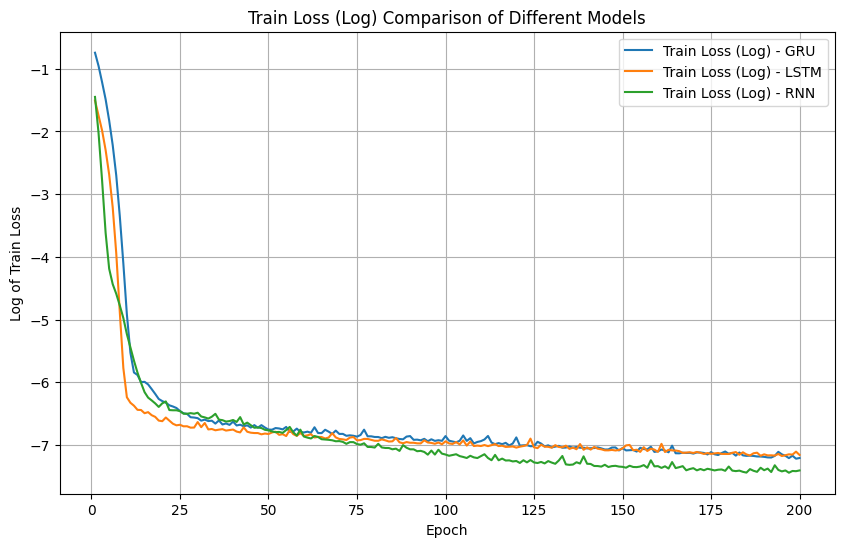

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 文件路径和模型名称
file_paths = [
    'different_model/GRU_training_log.csv',
    'different_model/LSTM_training_log.csv',
    'different_model/RNN_training_log.csv'
]
model_names = ['GRU', 'LSTM', 'RNN']

# 加载训练日志数据
def load_and_plot_train_loss(file_paths, model_names):
    plt.figure(figsize=(10, 6))

    for file_path, model_name in zip(file_paths, model_names):
        # 读取CSV文件
        data = pd.read_csv(file_path)
        
        # 对train_loss取对数
        log_train_loss = np.log(data['train_loss'] + 1e-5)  # 添加一个小的常数避免对数为负无穷
        
        # 绘制train_loss的对数曲线
        plt.plot(data['epoch'], log_train_loss, label=f'Train Loss (Log) - {model_name}')

    # 设置图表标题和标签
    plt.title('Train Loss (Log) Comparison of Different Models')
    plt.xlabel('Epoch')
    plt.ylabel('Log of Train Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    
    # 显示图表
    plt.show()



# 调用函数绘制train_loss对数曲线
load_and_plot_train_loss(file_paths, model_names)

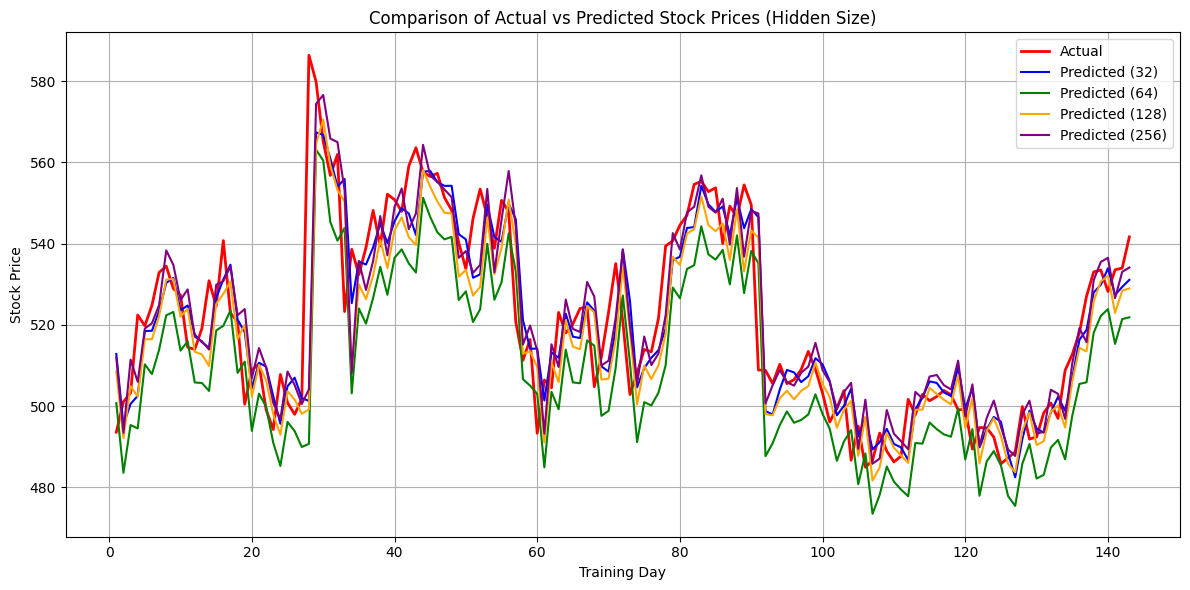

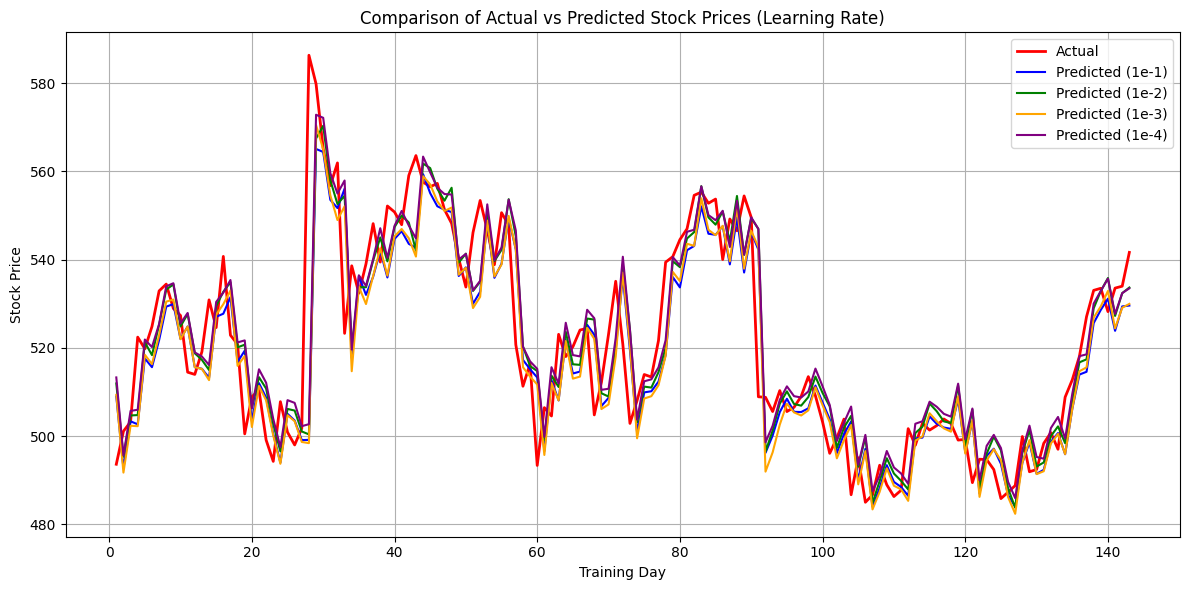

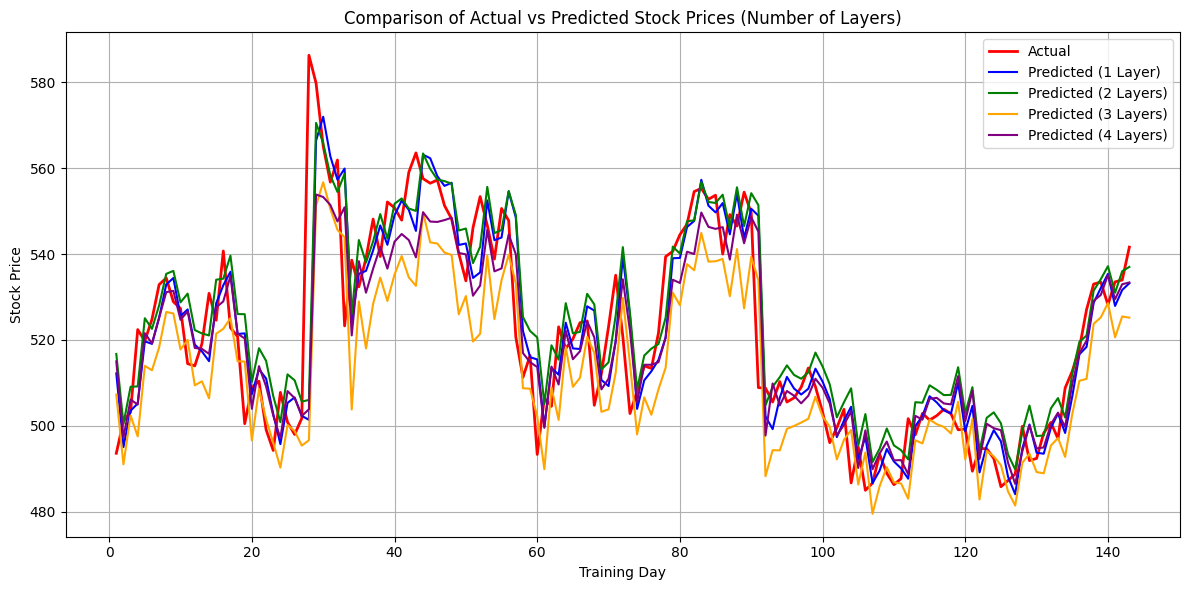

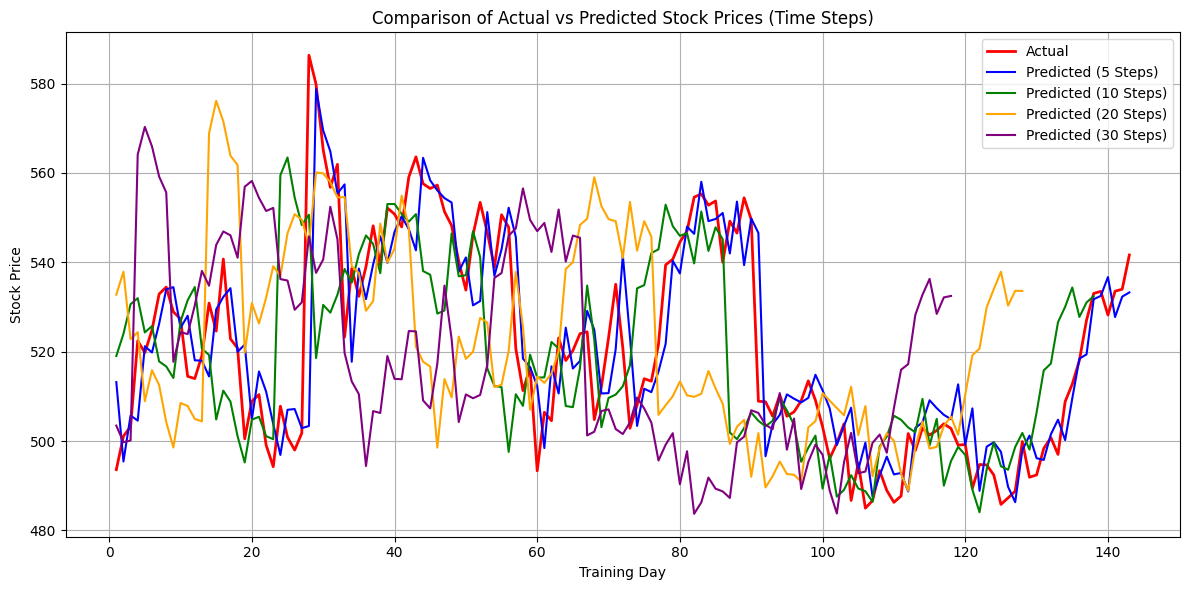

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths for each category
file_groups = {
    "Hidden Size": {
        "32": "hyper_parameter_tuning/hidden_size_32_validation_results.csv",
        "64": "hyper_parameter_tuning/hidden_size_64_validation_results.csv",
        "128": "hyper_parameter_tuning/hidden_size_128_validation_results.csv",
        "256": "hyper_parameter_tuning/hidden_size_256_validation_results.csv",
    },
    "Learning Rate": {
        "1e-1": "hyper_parameter_tuning/learning_rate_0.1_validation_results.csv",
        "1e-2": "hyper_parameter_tuning/learning_rate_0.01_validation_results.csv",
        "1e-3": "hyper_parameter_tuning/learning_rate_0.001_validation_results.csv",
        "1e-4": "hyper_parameter_tuning/learning_rate_0.0001_validation_results.csv",

     
    },
    "Number of Layers": {
        "1 Layer": "hyper_parameter_tuning/num_layers_1_validation_results.csv",
        "2 Layers": "hyper_parameter_tuning/num_layers_2_validation_results.csv",
        "3 Layers": "hyper_parameter_tuning/num_layers_3_validation_results.csv",
        "4 Layers": "hyper_parameter_tuning/num_layers_4_validation_results.csv",
    },
    "Time Steps": {
        "5 Steps": "hyper_parameter_tuning/time_steps_5_validation_results.csv",
        "10 Steps": "hyper_parameter_tuning/time_steps_10_validation_results.csv",
        "20 Steps": "hyper_parameter_tuning/time_steps_20_validation_results.csv",
        "30 Steps": "hyper_parameter_tuning/time_steps_30_validation_results.csv",
    },
}

# Function to plot a single comparison
colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "cyan"]

def plot_comparison(group_name, files):
    plt.figure(figsize=(12, 6))

    # Plot actual values from the first file (assume all have the same 'Actual')
    first_file = list(files.values())[0]
    df_actual = pd.read_csv(first_file)
    plt.plot(df_actual["Training Day"], df_actual["Actual"], label="Actual", color=colors[0],  linewidth=2)

    # Plot predictions for each configuration
    for idx, (label, file_path) in enumerate(files.items(), start=1):  # Start index at 1 for colors
        df = pd.read_csv(file_path)
        plt.plot(df["Training Day"], df["Predicted"], label=f"Predicted ({label})", color=colors[idx % len(colors)], linewidth=1.5)

    # Customize plot
    plt.xlabel("Training Day")
    plt.ylabel("Stock Price")
    plt.title(f"Comparison of Actual vs Predicted Stock Prices ({group_name})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate and display separate plots for each group
for group_name, files in file_groups.items():
    plot_comparison(group_name, files)